In [1]:
from model import *

In [2]:
# Imports
%matplotlib inline

import sys
import itertools
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots
from sklearn.metrics import accuracy_score, classification_report

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=1)

In [3]:
def create_sort_dataset(dataset_length, seq_length, max_number=999):
    x_train = np.random.randint(low=0, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_train = np.sort(x_train, axis=1)
    
    x_test = np.random.randint(low=0, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_test = np.sort(x_test, axis=1)
    
    return x_train, y_train, x_test, y_test

def create_dummy_dataset(dataset_length, seq_length, max_number):
    lower_bound = -1 * max_number
    x_train = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_train = np.where(x_train.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    x_test = np.random.randint(low=lower_bound, high=max_number+1, size=(dataset_length, seq_length, 1))
    y_test = np.where(x_test.sum(axis=2) > 0, 1, 0).reshape(x_train.shape)
    
    return x_train, y_train, x_test, y_test
    

In [4]:
# Set hyper-parameters
lmbd = 0.5  # Rmsprop lambda
learning_rate = 0.001  # Learning rate
momentum_term = 0.80  # Momentum term
eps = 1e-6  # Numerical stability term to prevent division by zero
mb_size = 20  # Size of the minibatches (number of samples)
max_num = 8
seq_length = 9
hidden_size = 30
nb_train = 200

x_train, y_train, x_test, y_test = create_sort_dataset(nb_train, seq_length, max_num)

input_size = 1
output_size = max_num+1

# Create the network
RNN = ModelSort(1, max_num+1, hidden_size, seq_length)
#RNN = RnnBinaryAdder(1, output_size, hidden_size, seq_length)
# Set the initial parameters
# Number of parameters in the network
nbParameters =  sum(1 for _ in RNN.get_params_iter())
# Rmsprop moving average
maSquare = [0.0 for _ in range(nbParameters)]
Vs = [0.0 for _ in range(nbParameters)]  # Momentum

# Create a list of minibatch losses to be plotted
ls_of_loss = [
    RNN.loss(RNN.getOutput(x_train[0:mb_size]), y_train[0:mb_size])]

# Iterate over some iterations
for i in range(50):
    print(f'Epoch {i+1}')
    # Iterate over all the minibatches
    for mb in range(nb_train // mb_size):
        X_mb = x_train[mb:mb+mb_size,:,:]  # Input minibatch
        T_mb = y_train[mb:mb+mb_size,:,:]  # Target minibatch
        V_tmp = [v * momentum_term for v in Vs]
        # Update each parameters according to previous gradient
        for pIdx, P in enumerate(RNN.get_params_iter()):
            P += V_tmp[pIdx]
        # Get gradients after following old velocity
        # Get the parameter gradients
        backprop_grads = RNN.getParamGrads(X_mb, T_mb)    
        # Update each parameter seperately
        for pIdx, P in enumerate(RNN.get_params_iter()):
            #P -= learning_rate * backprop_grads[pIdx]
            # Update the Rmsprop moving averages
            maSquare[pIdx] = lmbd * maSquare[pIdx] + (
                1-lmbd) * backprop_grads[pIdx]**2
            # Calculate the Rmsprop normalised gradient
            pGradNorm = ((
                learning_rate * backprop_grads[pIdx]) / np.sqrt(
                maSquare[pIdx]) + eps)
            # Update the momentum
            Vs[pIdx] = V_tmp[pIdx] - pGradNorm     
            P -= pGradNorm   # Update the parameter
        # Add loss to list to plot
        ls_of_loss.append(RNN.loss(RNN.getOutput(X_mb), T_mb))

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50


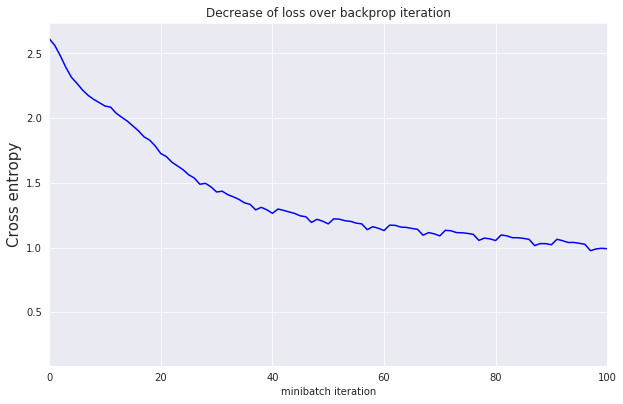

In [5]:
# Plot the loss over the iterations
fig = plt.figure(figsize=(10, 7))
plt.plot(ls_of_loss, 'b-')
plt.xlabel('minibatch iteration')
plt.ylabel('Cross entropy', fontsize=15)
plt.title('Decrease of loss over backprop iteration')
plt.xlim(0, 100)
fig.subplots_adjust(bottom=0.2)
plt.show()
#